<img src="https://rhyme.com/assets/img/logo-dark.png" align="center">

<h2 align="center"> Univariate Linear Regression </h2>

In this project, I did all the machine learning without using any of the popular machine learning libraries such as scikit-learn and statsmodels. The aim of this project is to implement the various algorithms myself, so I aimed to have a deeper understanding of the fundamentals under the guidance of the inspector, *Snehan Kekre, a machine learning and data science instructor at Rhyme. I will graduate in 2021 with a BSc in Computer Science and Artificial Intelligence from Minerva Schools at KGI, based in San Francisco*
please verify (link):
https://www.coursera.org/account/accomplishments/certificate/CXMABXZKS6ZB


---



### Task 2: Load the Data and Libraries
---

In [37]:
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline

In [38]:
import numpy as np
import pandas as pd  
import seaborn as sns 
plt.rcParams['figure.figsize'] = (12, 8)

In [39]:
df=pd.read_csv('/content/bike_sharing_data (1).txt')
df.sample(5)

,Population,Profit
10,5.7107,3.2522
76,7.5386,3.8845
26,12.8280,13.5010
6,7.4764,4.3483
79,5.1077,2.0576


### Task 3: Visualize the Data
---

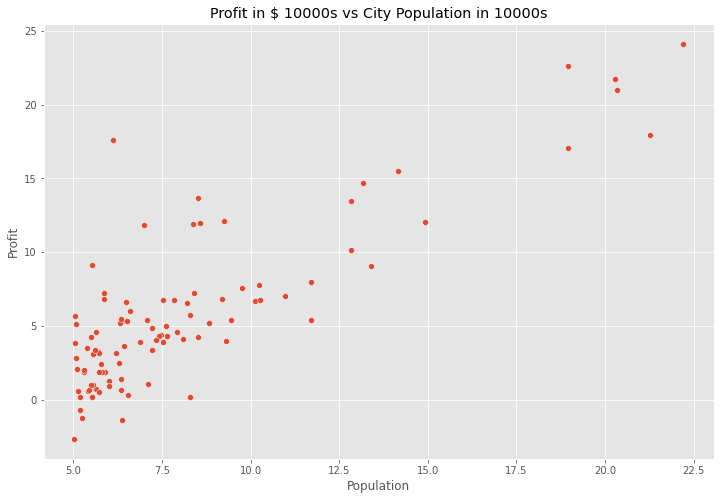

In [40]:
ax=sns.scatterplot(data=df, x='Population',y='Profit')
ax.set_title('Profit in $ 10000s vs City Population in 10000s')
plt.show();

In [41]:
x='Population'
y='Profit'

### Task 4: Compute the Cost $J(\theta)$
---

The objective of linear regression is to minimize the cost function

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)} )^2$$

where $h_{\theta}(x)$ is the hypothesis and given by the linear model

$$h_{\theta}(x) = \theta^Tx = \theta_0 + \theta_1x_1$$

In [44]:
def cost_function(X, y, theta):
    m=len(y)
    y_pred=X.dot(theta)
    error=(y_pred-y)**2
    return 1/(2*m)*np.sum(error)

In [45]:
m=df.Population.values.size
X=np.append(np.ones((m, 1)), df.Population.values.reshape(m, 1), axis=1)
y=df.Profit.values.reshape(m, 1)
theta=np.zeros((2,1)) 
cost_function(X, y, theta)

32.072733877455676

### Task 5: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat unitil convergence
        
$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$ (simultaneously update $\theta_j$ for all $j$).

In [46]:
def gradient_descent(X, y, theta, alpha, iterations):
    m=len(y)
    costs=[]
    for i in range(iterations):
        y_pred=X.dot(theta)
        error=np.dot(X.transpose(), (y_pred-y))
        theta -=alpha*1/m*error
        costs.append(cost_function(X, y, theta))
    return theta, costs
theta, costs=gradient_descent(X, y, theta, alpha=0.01, iterations=2000)
print('h(x)={}+{}x1'. format(str(round(theta[0,0], 2)), str(round(theta[1,0], 2))))

h(x)=-3.79+1.18x1


### Task 6: Visualising the Cost Function $J(\theta)$
---

In [56]:
from mpl_toolkits.mplot3d import Axes3D
theta_0=np.linspace(-10, 10, 100)
theta_1=np.linspace(-1, 4, 100)

In [60]:
cost_values=np.zeros((len(theta_0), len(theta_1)))
for i in range(len(theta_0)):
    for j in range(len(theta_1)):
        t=np.array([theta_0[i], theta_1[j]])
        cost_values[i,j]=cost_function(X, y, t)

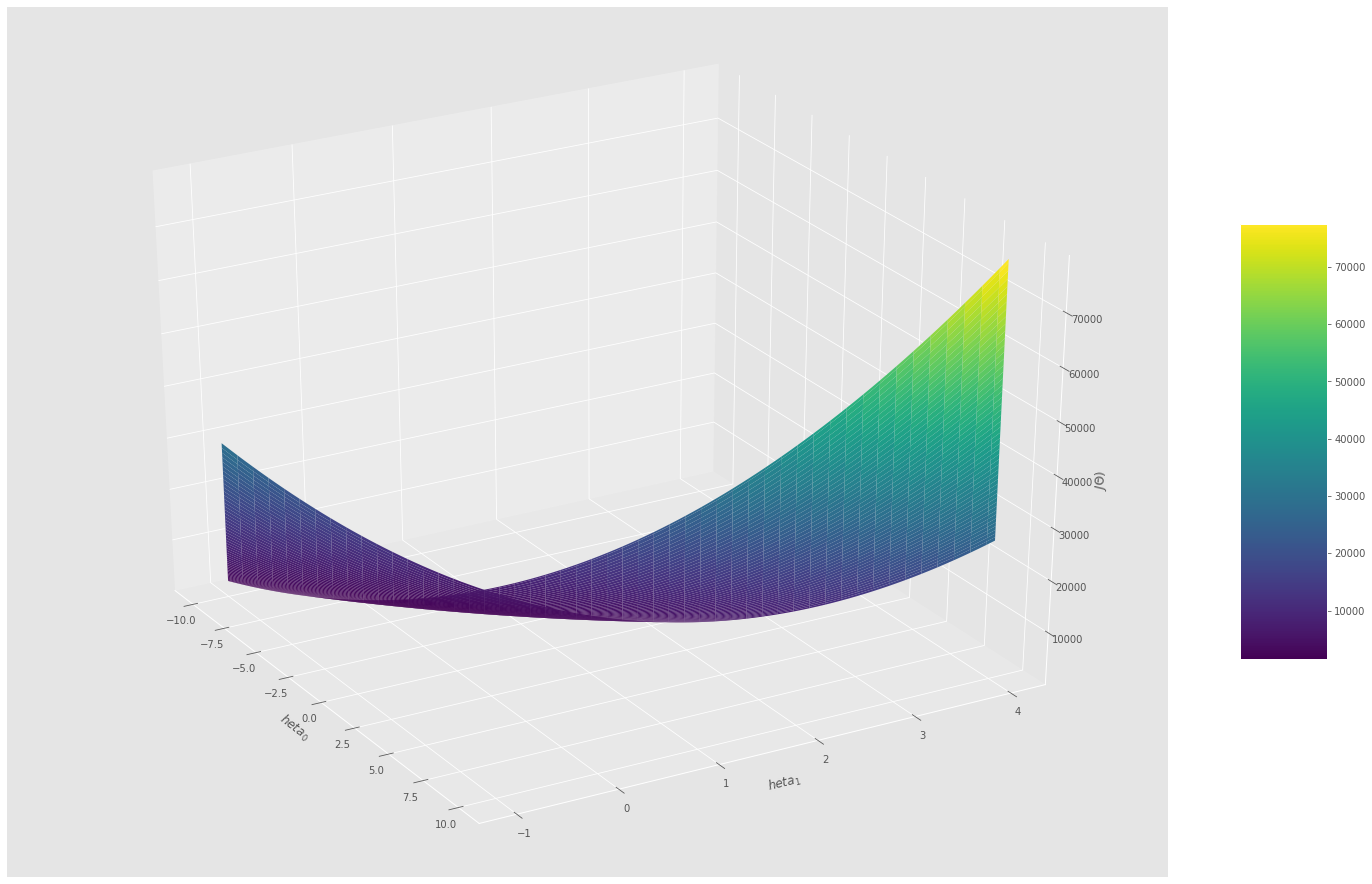

In [68]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(26, 16))
ax = fig.gca(projection='3d')

surf=ax.plot_surface(theta_0, theta_1, cost_values, cmap='viridis')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.xlabel('$\theta_0$')
plt.ylabel('$\theta_1$')
ax.set_zlabel('$J\Theta)$')
ax.view_init(30, 330)
plt.show()

### Task 7: Plotting the Convergence
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

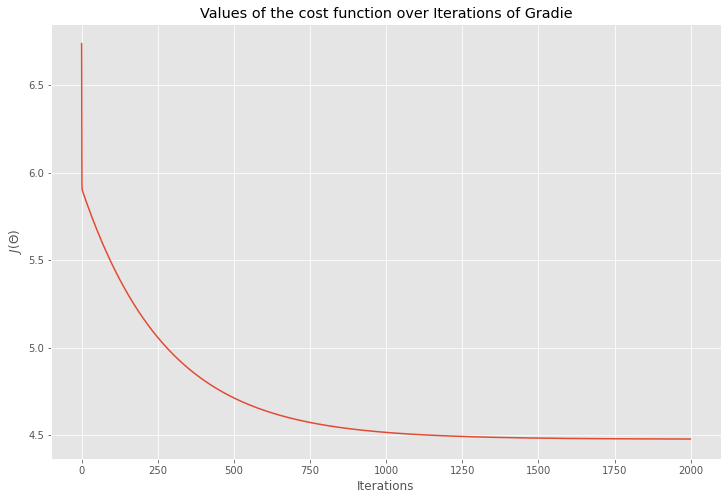

In [72]:
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('$J(\Theta)$')
plt.title('Values of the cost function over Iterations of Gradie');

### Task 8: Training Data with Linear Regression Fit
---

In [73]:
theta.shape

(2, 1)

In [74]:
theta

array([[-3.78806857],
       [ 1.18221277]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


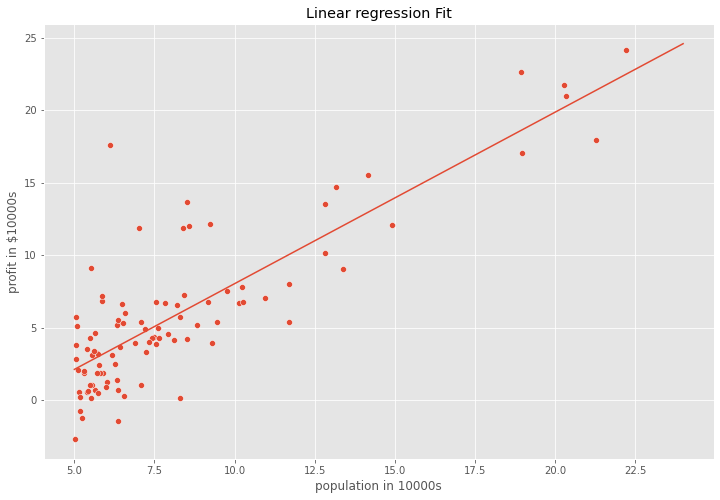

In [77]:
theta=np.squeeze(theta)
sns.scatterplot(x='Population', y='Profit', data=df)
x_value=[x for x in range(5,25)]
y_value=[(x*theta[1]+theta[0]) for x in x_value]
sns.lineplot(x_value, y_value)
plt.xlabel('population in 10000s')
plt.ylabel('profit in $10000s')
plt.title('Linear regression Fit');

### Task 9: Inference using the optimized $\theta$ values
---

$h_\theta(x) = \theta^Tx$

In [79]:
def predict(x, theta):
    y_pred=np.dot(theta.transpose(), x)
    return y_pred

In [83]:
y_pred_1=predict(np.array([1,4]), theta)*10000
print('for a population of 40000 people, the model predicts a profit of $' + str(round(y_pred_1, 0)))

for a population of 40000 people, the model predicts a profit of $9408.0


In [88]:
y_pred_2=predict(np.array([1,8.3]), theta)*10000
print('for a population of 83000 people, the model predicts a profit of $' + str(round(y_pred_2, 0)))

for a population of 83000 people, the model predicts a profit of $60243.0
